This code uses a machine learning model to predict ESG (Environmental, Social, and Governance) scores based on three external factors: market trends, regulatory changes, and economic indicators.

### Code Explanation:

1. **Data Generation**:
   - It creates 100 samples with the following columns:
     - `market_trend`: Normally distributed values simulating market trends.
     - `regulatory_change`: Binary values (0 or 1) indicating regulatory changes.
     - `economic_indicator`: Normally distributed values simulating economic indicators.
     - `esg_score`: Normally distributed values representing the ESG scores, which will act as the target variable for the model.
   - This synthetic data is saved as `esg_data.csv`.

2. **Model Selection**:
   - The prediction model is a **Random Forest Regressor**, a machine learning algorithm that builds multiple decision trees and averages their outputs to provide robust predictions.
   - This model is well-suited for this type of data as it can handle nonlinear relationships and provides feature importance, which is useful for identifying the most influential factors.

The generated data file, `esg_data.csv`, contains the synthetic ESG scores and associated factors, which can be loaded and used to train the predictive model.

   esg_score  market_trend  regulatory_change  economic_indicator
0  54.967142     -1.415371                  1           -0.151785
1  48.617357     -0.420645                  1            0.588317
2  56.476885     -0.342715                  0            0.280992
3  65.230299     -0.802277                  1           -0.622700
4  47.658466     -0.161286                  0           -0.208122
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   esg_score           100 non-null    float64
 1   market_trend        100 non-null    float64
 2   regulatory_change   100 non-null    int64  
 3   economic_indicator  100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB
None
Mean Squared Error: 68.28737967763607
R^2 Score: -0.1021080908234151


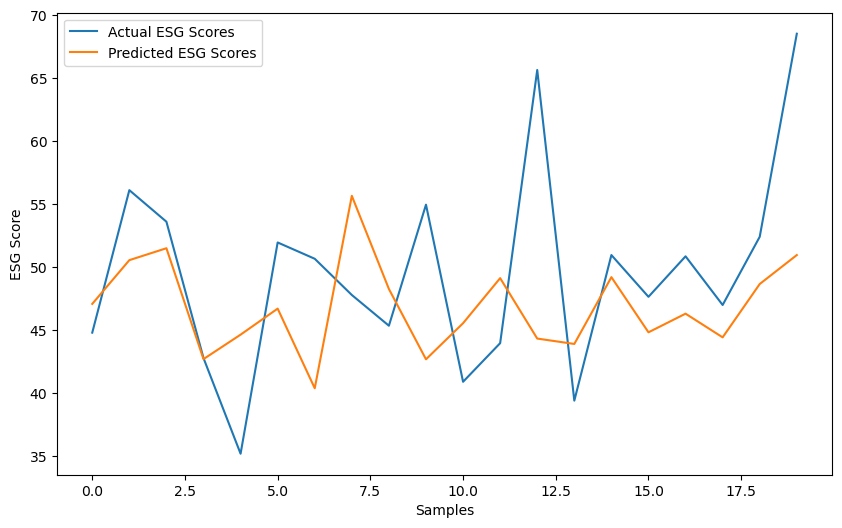

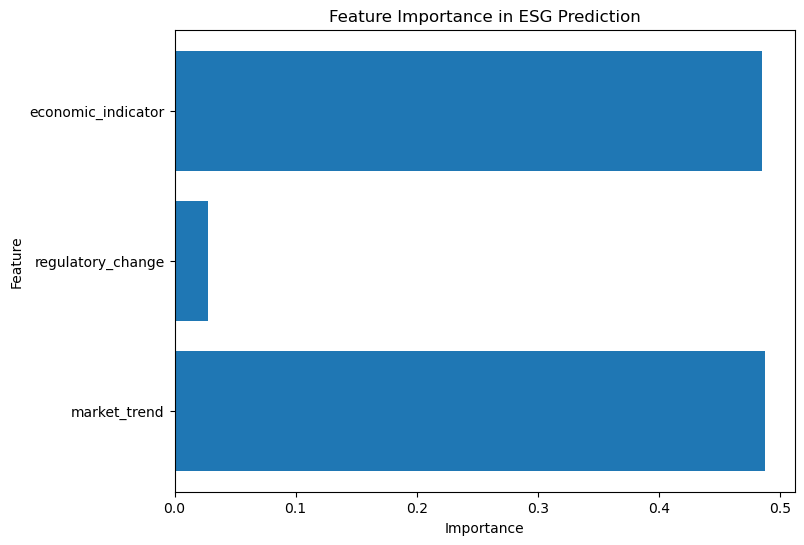

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 加载数据
data = pd.read_csv('./data/esg_forecast_data.csv')  # 替换成你的数据集路径

# 检查数据基本信息
print(data.head())
print(data.info())

# 假设数据包含以下列：'esg_score', 'market_trend', 'regulatory_change', 'economic_indicator'
# 'esg_score'为目标变量，其他为特征

# 2. 数据预处理
# 分离特征和目标变量
X = data[['market_trend', 'regulatory_change', 'economic_indicator']]
y = data['esg_score']

# 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. 模型训练
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. 模型预测
y_pred = model.predict(X_test)

# 5. 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 可视化预测结果与实际结果的比较
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual ESG Scores')
plt.plot(y_pred, label='Predicted ESG Scores')
plt.xlabel('Samples')
plt.ylabel('ESG Score')
plt.legend()
plt.show()

# 6. 特征重要性分析
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in ESG Prediction')
plt.show()
